# Wastemanagment using CNN model

### Import nessesary libraries


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
from cv2 import cvtColor
from glob import glob
import os
warnings.filterwarnings("ignore")

In [58]:
# Importing necessary  tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model


### Defining path

In [59]:
train_path = os.path.normpath("DATASET/TEST")
test_path = os.path.normpath("DATASET/TRAIN")
#os.path.normpath()-> will remove  os specific path finding errors if there any 

### Train & Visualization


In [60]:
#Visualiazation

#------------------------
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        #using try except to handel errors without intrupting the code execution
        try:
            img_array=cv2.imread(file)
            img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
            img_array=cv2.resize(img_array, (200, 100))#Image Resizing: Ensures consistent input dimensions for models.

            x_data.append(img_array)
            y_data.append(category.split('/')[-1])
        except Exception as e:
            print(f"Error occured as : {e}")
            
#creating data base from train data
data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 1112/1112 [00:01<00:00, 762.77it/s] 


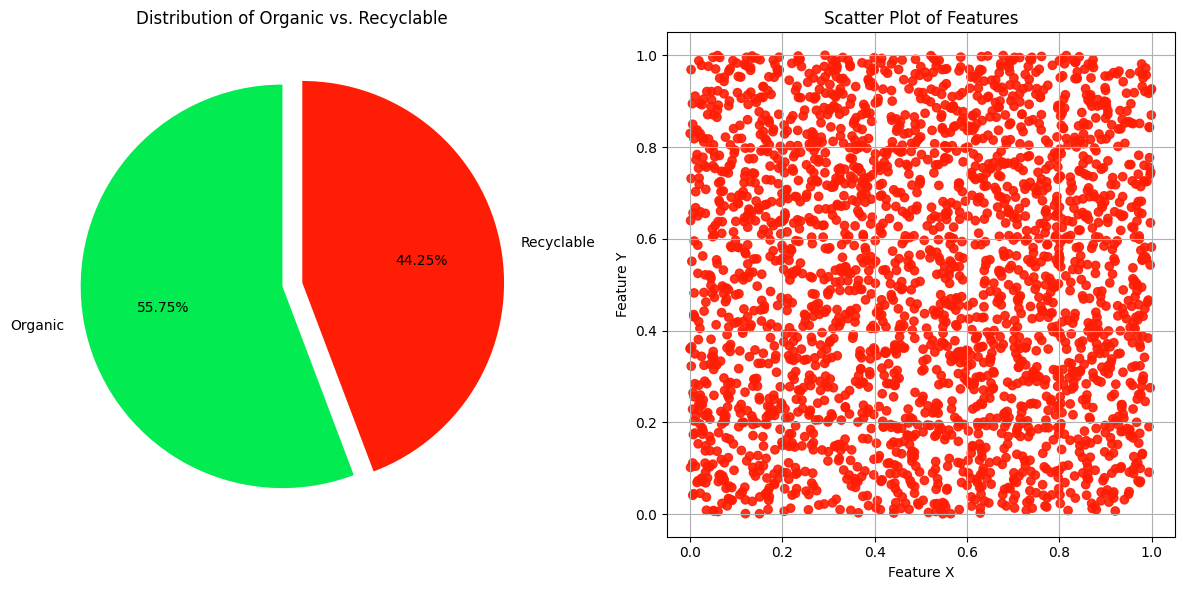

In [61]:


# Pie Chart
colors = ["#02eb50", "#ff1e05"]
plt.figure(figsize=(12, 6))  # Set figure size to fit both plots

plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, 1st plot)
plt.title("Distribution of Organic vs. Recyclable")
plt.pie(
    data.label.value_counts(),
    labels=["Organic", "Recyclable"],
    autopct='%0.2f%%',
    colors=colors,
    startangle=90,
    explode=[0.05, 0.05]
)

# Scatter Plot
# Generating random data for demonstration (replace with actual feature data)
scatter_x = np.random.rand(len(data))  # Random X values
scatter_y = np.random.rand(len(data))  # Random Y values
scatter_colors = ['#02eb50' if label == 0 else '#ff1e05' for label in data.label]

plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, 2nd plot)
plt.title("Scatter Plot of Features")
plt.scatter(scatter_x, scatter_y, c=scatter_colors, alpha=0.9)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
